In [0]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [0]:
X = (load_boston().data)
Y = (load_boston().target)
Y = Y.reshape(506,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
S = StandardScaler()
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
Y_train = pd.DataFrame(Y_train)



(354, 13)
(152, 13)
(354, 1)
(152, 1)


# Manual SGD Regressor Function

In [0]:
def manualreg(n_samples,n_iter):
#Initialise W and b
  W= np.zeros(13)
  W  = np.random.normal(0,1,size = W.size)
  W=W.reshape(13,1)
  b=0
  r=0.1
  t=1


  for i in range(n_iter):
   
    x = X_train.sample(n=n_samples,random_state=n_iter)
    y=  Y_train.sample(n=n_samples,random_state=n_iter)
    x = x.values
    y=  y.values
    
    delta = np.dot(x.T,(y - (np.dot(x,W)+b)))
    delta *= -2/x.shape[0]
    delta = r*delta
    W = W - delta
    bias1 = (y- (np.dot(x,W)+b))
    bias1 = np.mean(bias1)
    bias1 *= -2/x.shape[0]
    bias1 = r*bias1
    b = b - bias1
  
  
  y_pred = (np.dot(X_test.values,W)+b)
  plt.scatter(Y_test, y_pred)
  plt.xlabel("Prices: $Y_i$")
  plt.ylabel("Predicted prices: $\hat{Y}_i$")
  plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
  plt.show()
  manual = mean_squared_error(Y_test,y_pred)
  print("Mean squared error is {} ".format(manual))
  return W,b,manual

# SKlearn SGD Regressor Implementation

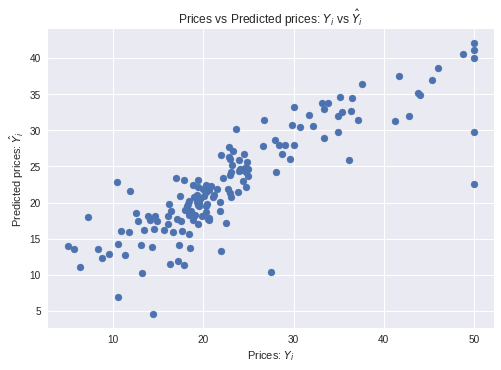

Mean squared error is 26.882307061220374 


In [0]:
clf = SGDRegressor()
clf.fit(X_train.values, Y_train.values)
a = clf.predict(X_test.values)

plt.scatter(Y_test, a)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()
print("Mean squared error is {} ".format(mean_squared_error(Y_test, a)))
#Getting weights 
weightsk = clf.coef_

# Implementation of own regressor and comparison.

# 1.1 Taking 100 samples with 500 iterations

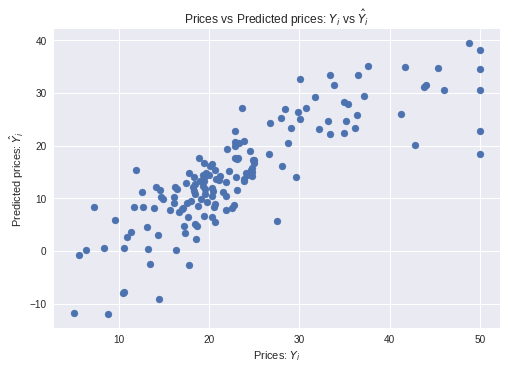

Mean squared error is 106.19019289680918 


In [0]:
#manual function parameters : manual(no. of samples, no. of iterations.)
# taking 100,100
weights,bias,mse = manualreg(100,500)

The MSE is too large compared to SGDRegressor.


# 1.2 Taking 100 samples with 1000 iterations.

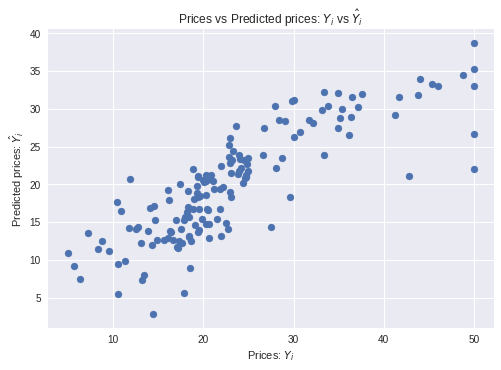

Mean squared error is 40.91420139476845 


In [0]:
weights,bias,mse = manualreg(100,1000)

Still, the MSE is large.

# 1.3 Increasing the no. of sample to 150 and iterations to 3000

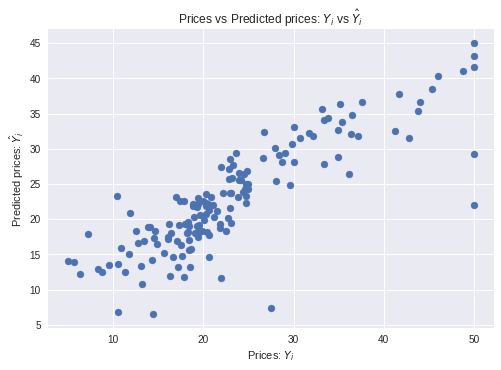

Mean squared error is 27.288335503046675 


In [0]:
weights,bias,mse = manualreg(150,3000)

# 1.3 Taking 200 samples with 3000 iterations.

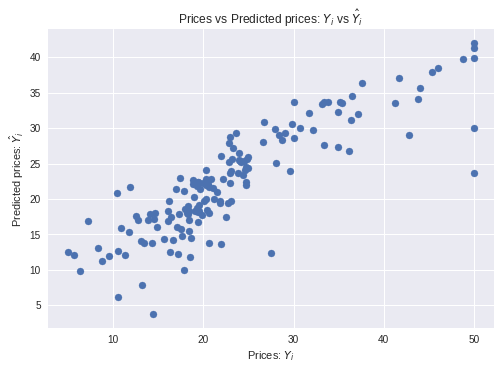

Mean squared error is 26.359994348634444 


In [0]:
weights,bias,mse = manualreg(200,3000)

Thus, the mse of manual regressor is equal to that of SKlearn's SGD.


# 1.4 Taking 200 samples and 4000 iterations.


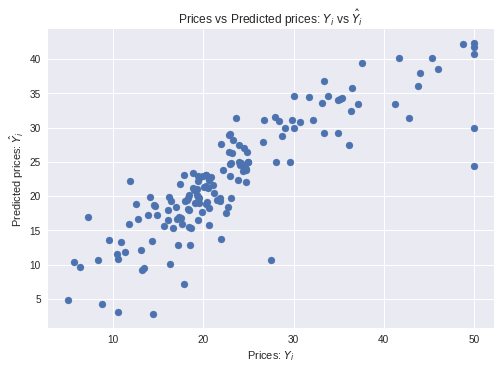

Mean squared error is 24.72414246198188 


In [0]:
weights,bias,mse = manualreg(200,4000)

# Conclusion:

Comparing weights and MSE

In [0]:
print("Weights of manual regressor vs. weights of SKLEARN SGD REGRESSOR ")
w = pd.DataFrame(weights,weightsk)
w

Weights of manual regressor vs. weights of SKLEARN SGD REGRESSOR 


,0
0.019622,-0.943034
0.427127,1.002010
-0.556406,0.380954
0.667442,-0.002882
-0.838134,-2.371337
3.133494,3.346550
-0.188253,0.397533
-1.951816,-3.039427
0.722935,2.996886
-0.665470,-2.699180


MSE of Manual Regressor : 24.72414246198188 

MSE of SGD Regressor :       26.882307061220374

Conclusion:
1. As iterations increases ,the MSE decreases.

2. From the weights comparison, it can be concluded that the weights are almost similar. Some weights of manual SGD are even a bit less than SGD Regressor since, the MSE also differs by 2.

3. A point comes when , even if the iterations are increased, the MSE doesn't go down beyond a certain point. Thus, samples need to be increased with iterations.

4. The MSE doesn't go below this 24 point. Experimenting furthur, it was observed that, taking additional iterations, the MSE again increased to 25. Observed the same with 300 sample and upto 8000 iterations. The MSE doesn't go below the 24/25 point.
